<h2><center>Final Project: Where it Pays to Attend College</center></h2>

<h3><center>By Ansh Vanam and Rishi Mullangi<center></h3>

<h2>Introduction</h2>

For our final project, we have decided to work with a dataset that contains salaries of various college graduates based on major, type of school (private, public), and region. The dataset we chose has three separate CSV files, "salaries-by-college-type.csv", "salaries-by-region.csv", and "degrees-that-pay-back.csv". These CSV files contain data from graduating up to their mid-career, including percentiles ranging from 10-90. 

Throughout this tutorial, we want to investigate a couple of questions: 

1. What factors affect Mid-Career Salaries, and is it heavily dependant on starting salary? 

2. Is there a relationship between earning potential and college type/region?

3. Do the majors that have the highest starting salary have the highest mid career salaries, and vice vesa?

Using these CSV files, we plan to look into how these variables affect the salaries of students, and how these factors can affect choices of students looking to go into college. After that, we plan to make a prediction model that will project average Mid-Career  salaries based on region and starting median salaries. 

Our first step is to navigate to this Kaggle dataset, created by the Wall Street Journal:

https://www.kaggle.com/datasets/wsj/college-salaries/code?resource=download&select=salaries-by-college-type.csv

From here, we can download the three CSV files and import them into our code editor. Then, we use pandas to create dataframes out of the CSV files. 

Note: Ensure you have the following python libraries installed on your system and the CSV files downloaded to run the tutorial.

Pandas documentation - https://pandas.pydata.org/docs/ 

Seaborn documentation - https://seaborn.pydata.org

Numpy documentation - https://numpy.org/doc/ 

Matplotlib documentation - https://matplotlib.org/stable/index.html 

Sklearn Documentation: https://scikit-learn.org/stable/

In [88]:
#Importing our required libraries
import pandas as pd
import numpy as np
import statsmodels.api as stm
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
from matplotlib.pyplot import figure
import seaborn as sns 
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import svm

<h2>Obtaining and Cleaning Data</h2>

The first table we're looking at is salaries-by-college-type, which details the names of various colleges as well as their School Type. In the next python block we will work on cleaning the data and making it more useable. First, we need to change the values to floats so that we can do operations on them. Then, we change the names of the columns to be more clear and correspond well with the other dataframes we will initialize.

In [89]:
#Reading in the CSV file and converting it to a dataframe using pandas
df_by_colleges = pd.read_csv('salaries-by-college-type.csv')

#Getting rid of $ signs as well as commas so that we can convert values to floats. 
for (columnName, columnData) in df_by_colleges.iteritems():
    df_by_colleges[columnName] = df_by_colleges[columnName].str.replace('$','')
    df_by_colleges[columnName] = df_by_colleges[columnName].str.replace(',', '')
df_by_colleges = df_by_colleges.astype({'Starting Median Salary':'float', 
'Mid-Career Median Salary': 'float', 'Mid-Career 10th Percentile Salary': 'float', 
'Mid-Career 25th Percentile Salary':'float', 'Mid-Career 75th Percentile Salary':'float', 
'Mid-Career 90th Percentile Salary':'float'})

print(df_by_colleges.dtypes)

#Rename columns to be more concise but still descriptive 
df_by_colleges = df_by_colleges.rename(columns = {'School Name':'School Name',
'School Type':'School Type','Starting Median Salary':'Starting Median', 
'Mid-Career Median Salary':'Mid-Career Median', 
'Mid-Career 10th Percentile Salary':'Mid-Career 10%',
'Mid-Career 25th Percentile Salary':'Mid-Career 25%', 
'Mid-Career 75th Percentile Salary':'Mid-Career 75%', 
'Mid-Career 90th Percentile Salary':'Mid-Career 90%'})
df_by_colleges.head()

School Name                           object
School Type                           object
Starting Median Salary               float64
Mid-Career Median Salary             float64
Mid-Career 10th Percentile Salary    float64
Mid-Career 25th Percentile Salary    float64
Mid-Career 75th Percentile Salary    float64
Mid-Career 90th Percentile Salary    float64
dtype: object


,School Name,School Type,Starting Median,Mid-Career Median,Mid-Career 10%,Mid-Career 25%,Mid-Career 75%,Mid-Career 90%
0,Massachusetts Institute of Technology (MIT),Engineering,72200.0,126000.0,76800.0,99200.0,168000.0,220000.0
1,California Institute of Technology (CIT),Engineering,75500.0,123000.0,NaN,104000.0,161000.0,NaN
2,Harvey Mudd College,Engineering,71800.0,122000.0,NaN,96000.0,180000.0,NaN
3,Polytechnic University of New York Brooklyn,Engineering,62400.0,114000.0,66800.0,94300.0,143000.0,190000.0
4,Cooper Union,Engineering,62200.0,114000.0,NaN,80200.0,142000.0,NaN


Now that we've cleaned up our first table by converting the values that are numerical to floats, we can move on to the next table, 'degrees-that-pay-back.csv', which details undergraduate major's median starting salary in relation to their undergraduate major, mid-career median salary, and other useful information that we can use later on in the tutorial. We will stick to the same column renaming conventions so that the column names remain aligned across the different dataframes

In [90]:
#Reading in the CSV file and converting it to a dataframe using pandas
df_by_major = pd.read_csv('degrees-that-pay-back.csv')

#Changing all of the columns to floats (Where required)
for (columnName, columnData) in df_by_major.iteritems():
    if(columnName == 'Percent change from Starting to Mid-Career Salary'): continue
    df_by_major[columnName] = df_by_major[columnName].str.replace('$','')
    df_by_major[columnName] = df_by_major[columnName].str.replace(',', '')
df_by_major = df_by_major.astype({'Starting Median Salary':'float', 
'Mid-Career Median Salary': 'float', 'Mid-Career 10th Percentile Salary': 'float', 
'Mid-Career 25th Percentile Salary':'float', 'Mid-Career 75th Percentile Salary':'float', 
'Mid-Career 90th Percentile Salary':'float'})

print(df_by_major.dtypes)

#Rename columns to be more concise but still descriptive 
df_by_major = df_by_major.rename(columns = {'Undergraduate Major':'Major',
'Starting Median Salary':'Starting Median', 
'Mid-Career Median Salary':'Mid-Career Median', 
'Percent change from Starting to Mid-Career Salary': 'Start to Mid % Change',
'Mid-Career 10th Percentile Salary':'Mid-Career 10%',
'Mid-Career 25th Percentile Salary':'Mid-Career 25%', 
'Mid-Career 75th Percentile Salary':'Mid-Career 75%', 
'Mid-Career 90th Percentile Salary':'Mid-Career 90%'})
df_by_major.head()

Undergraduate Major                                   object
Starting Median Salary                               float64
Mid-Career Median Salary                             float64
Percent change from Starting to Mid-Career Salary    float64
Mid-Career 10th Percentile Salary                    float64
Mid-Career 25th Percentile Salary                    float64
Mid-Career 75th Percentile Salary                    float64
Mid-Career 90th Percentile Salary                    float64
dtype: object


,Major,Starting Median,Mid-Career Median,Start to Mid % Change,Mid-Career 10%,Mid-Career 25%,Mid-Career 75%,Mid-Career 90%
0,Accounting,46000.0,77100.0,67.6,42200.0,56100.0,108000.0,152000.0
1,Aerospace Engineering,57700.0,101000.0,75.0,64300.0,82100.0,127000.0,161000.0
2,Agriculture,42600.0,71900.0,68.8,36300.0,52100.0,96300.0,150000.0
3,Anthropology,36800.0,61500.0,67.1,33800.0,45500.0,89300.0,138000.0
4,Architecture,41600.0,76800.0,84.6,50600.0,62200.0,97000.0,136000.0


Finally, we can look at the last CSV file, 'salaries-by-region.csv', which details college graduate salaries by region and college. We will perform the same operations on this dataframe, namely, converting values to floats as appropriate, and renaming columns for compatibility across the dataframes.

In [91]:
#Reading in the CSV file and converting it to a dataframe using pandas
df_by_region = pd.read_csv('salaries-by-region.csv')

#Converting numerical columns to float values.
for (columnName, columnData) in df_by_region.iteritems():
    if(columnName == 'Percent change from Starting to Mid-Career Salary'): continue
    df_by_region[columnName] = df_by_region[columnName].str.replace('$','')
    df_by_region[columnName] = df_by_region[columnName].str.replace(',', '')
df_by_region = df_by_region.astype({'Starting Median Salary':'float', 
'Mid-Career Median Salary': 'float', 'Mid-Career 10th Percentile Salary': 'float', 
'Mid-Career 25th Percentile Salary':'float', 'Mid-Career 75th Percentile Salary':'float', 
'Mid-Career 90th Percentile Salary':'float'})

print(df_by_region.dtypes)

#Rename columns to be more concise but still descriptive 
df_by_region = df_by_region.rename(columns = {'School Name':'School Name',
'Starting Median Salary':'Starting Median', 
'Mid-Career Median Salary':'Mid-Career Median', 
'Mid-Career 10th Percentile Salary':'Mid-Career 10%',
'Mid-Career 25th Percentile Salary':'Mid-Career 25%', 
'Mid-Career 75th Percentile Salary':'Mid-Career 75%', 
'Mid-Career 90th Percentile Salary':'Mid-Career 90%'})
df_by_region.head()

School Name                           object
Region                                object
Starting Median Salary               float64
Mid-Career Median Salary             float64
Mid-Career 10th Percentile Salary    float64
Mid-Career 25th Percentile Salary    float64
Mid-Career 75th Percentile Salary    float64
Mid-Career 90th Percentile Salary    float64
dtype: object


,School Name,Region,Starting Median,Mid-Career Median,Mid-Career 10%,Mid-Career 25%,Mid-Career 75%,Mid-Career 90%
0,Stanford University,California,70400.0,129000.0,68400.0,93100.0,184000.0,257000.0
1,California Institute of Technology (CIT),California,75500.0,123000.0,NaN,104000.0,161000.0,NaN
2,Harvey Mudd College,California,71800.0,122000.0,NaN,96000.0,180000.0,NaN
3,University of California Berkeley,California,59900.0,112000.0,59500.0,81000.0,149000.0,201000.0
4,Occidental College,California,51900.0,105000.0,NaN,54800.0,157000.0,NaN


<h2>Data Management/Representation</h2>
Next, we will represent various data from the dataframes to try and understand the tables more, and focus our tutorial. These graphs will provide a visual understanding of what all the dataframes represent.

First, we want to understand the relationship between region and starting median salary, to see if the region has a heavy effect on new graduates' salaries. To do this, we can create a simple bar graph that will display the median salary ranges of the various regions. 

[]

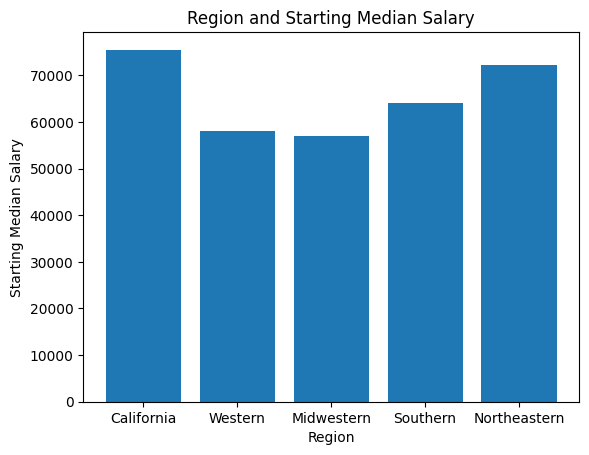

In [92]:
#plt.figure(figsize = (10,7))
plt.title('Region and Starting Median Salary')
plt.xlabel('Region')
plt.ylabel('Starting Median Salary')
plt.bar(df_by_region['Region'], df_by_region['Starting Median'])
plt.plot()

Here, we see that California universities have the highest starting median salary, followed closely by colleges in the Northeast. 

It is likely that a high percentage of students decide to live within the same region/state where they went to school. Since California and the Northeast are more expensive to live in than the other three regions, it makes sense that the starting median salary for students attending universities in either of the two regions is also higher. 

California and the Northeast might also have a higher percentage of prestigious schools than the other regions, which lead to better job offers as well as more companies hiring from these locations. Since California is considered a tech hub, it makes sense that their starting salary is the highest of the five regions, as lots of major tech companies that pay well hire from Californian schools. 

Now we will replicate the Median Salary vs Region graph, except for Mid Career instead of Starting, to see how careers progress over time in the various regions. 

[]

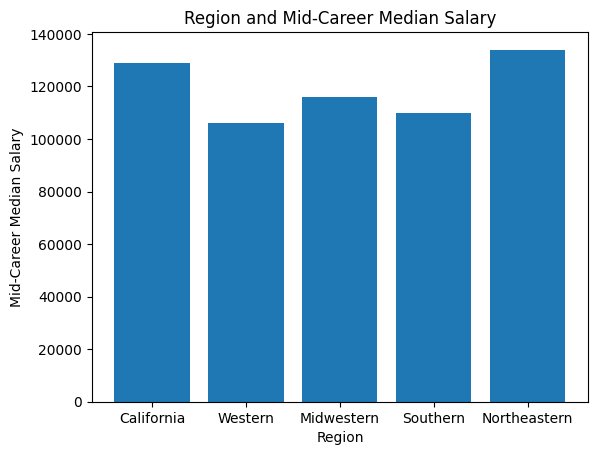

In [93]:
#plt.figure(figsize = (10,7))
plt.title('Region and Mid-Career Median Salary')
plt.xlabel('Region')
plt.ylabel('Mid-Career Median Salary')
plt.bar(df_by_region['Region'], df_by_region['Mid-Career Median'])
plt.plot()

Here we see that although California universities have the highest starting median salary, Northeastern universities have the highest mid career median salary. This gives us insight into how although Californian schools boast a high starting wage, a worker may be better off shifting to the Northeast region if they want to maximize their pay during their Mid-Career years. 

School Type vs. Starting Median

[]

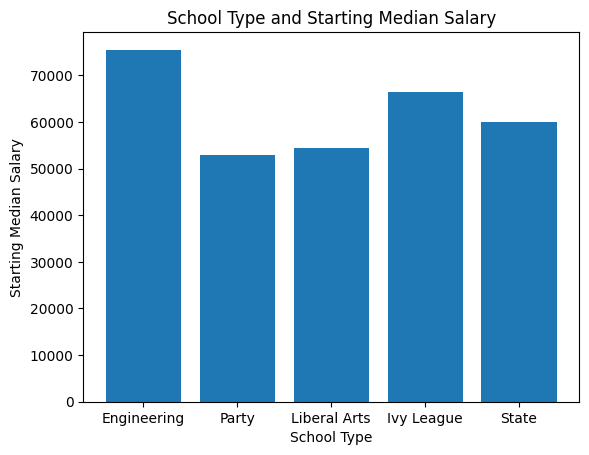

In [94]:
#plt.figure(figsize = (10,7))
plt.title('School Type and Starting Median Salary')
plt.xlabel('School Type')
plt.ylabel('Starting Median Salary')
plt.bar(df_by_colleges['School Type'], df_by_colleges['Starting Median'])
plt.plot()

Here, we can see that the Engineering starting salary is the highest, beating out Ivy League schools, and party schools by over $20,000.

School Type vs. Mid-Career Median

[]

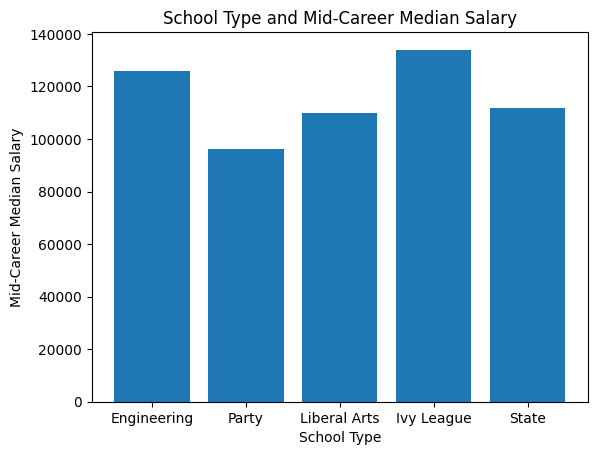

In [95]:
#plt.figure(figsize = (10,7))
plt.title('School Type and Mid-Career Median Salary')
plt.xlabel('School Type')
plt.ylabel('Mid-Career Median Salary')
plt.bar(df_by_colleges['School Type'], df_by_colleges['Mid-Career Median'])
plt.plot()

We notice that the starting median salary from Engineering schools is higher than that of Ivy League, but the mid career median salary of Engineering schools is lower than that of Ivy League. This is a trend similar to what we noticed in California-Northeastern school salaries.

Major vs Salary analysis

In [107]:
#Start
starting_order = df_by_major.sort_values(by = 'Starting Median', ascending = False)['Major'].reset_index(drop = True)
starting_order

0                      Physician Assistant
1                     Chemical Engineering
2                     Computer Engineering
3                   Electrical Engineering
4                   Mechanical Engineering
5                    Aerospace Engineering
6                   Industrial Engineering
7                         Computer Science
8                                  Nursing
9                        Civil Engineering
10                            Construction
11                                 Physics
12                               Economics
13    Management Information Systems (MIS)
14             Information Technology (IT)
15                                 Finance
16                              Accounting
17                                    Math
18                                 Geology
19                     Business Management
20                             Agriculture
21                               Chemistry
22                            Architecture
23         

For our final data analysis representation, we wanted to showcase the starting, mid-career, and 90th percentile mid-career salaries as time goes on using a boxplot, as this would show outliers, median, and the varying quartiles.

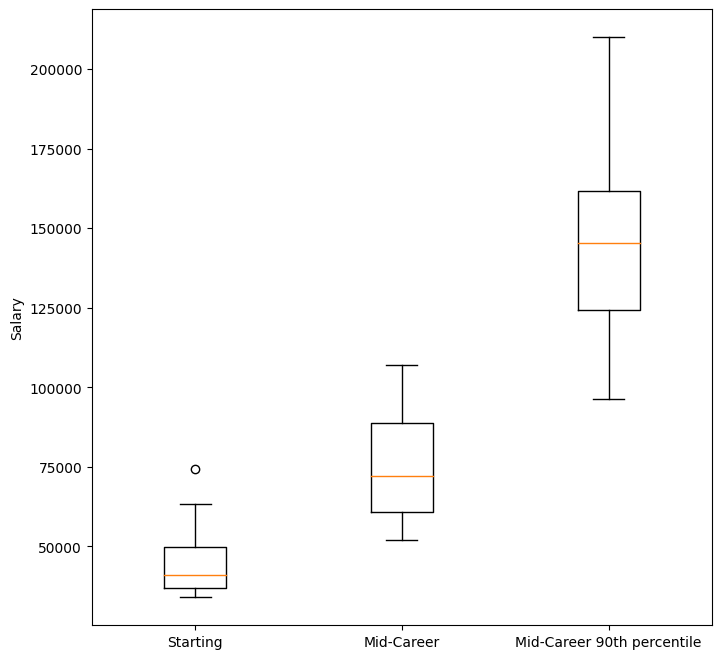

In [109]:
plt.figure(figsize=(8,8))
lst = [df_by_major['Starting Median'], df_by_major['Mid-Career Median'], df_by_major['Mid-Career 90%']]

plt.boxplot(lst)
plt.ylabel('Salary')
plt.xticks([1,2,3], ['Starting', 'Mid-Career', 'Mid-Career 90th percentile'])
plt.show()

Here we see that starting salaries have the shortest standard deviation, followed by mid-career, and mid-career 90th percentile has the largest standard deviation with a large range. There is also an outlier in the starting salaries: ~75,000, which is greater even than the median of the mid-career salaries

In [99]:
#Finding out which major has the highest starting median salary
df_by_major[df_by_major['Starting Median'] == df_by_major['Starting Median'].max()]

,Major,Starting Median,Mid-Career Median,Start to Mid % Change,Mid-Career 10%,Mid-Career 25%,Mid-Career 75%,Mid-Career 90%
43,Physician Assistant,74300.0,91700.0,23.4,66400.0,75200.0,108000.0,124000.0


In [111]:
df_by_major[df_by_major['Mid-Career Median'] == df_by_major['Mid-Career Median'].max()]

,Major,Starting Median,Mid-Career Median,Start to Mid % Change,Mid-Career 10%,Mid-Career 25%,Mid-Career 75%,Mid-Career 90%
8,Chemical Engineering,63200.0,107000.0,69.3,71900.0,87300.0,143000.0,194000.0


We notice that the start to mid-career salary change for physician assistant is 23.4%

In [100]:
#Finding the mean mid-career median salary
df_by_major['Mid-Career Median'].mean()

74786.0

In [101]:
#Finding the mean percentage change from starting to midcareer salaries for all majors
df_by_major['Start to Mid % Change'].mean()

69.274

Although the physician assistant starting median salary is much higher than the starting salaries for the other majors, we see that the 'start to mid career percentage change' in salary of physician assistant is 23.4%, which is a lot lower than that of the mean 'start to mid career percentage change' of 69.3%.

This shows that the starting salary is not the only indicator of mid career salaries and other factors affect it as well, answering one of our three questions above. 

<h2>Predicting Mid-Career Median Salary based on School Type and Starting Salary</h2>

For the next part of our tutorial, we will be attempting to make a model that predicts Mid-Career Median salaries based on the school type that the student is attending and their projected starting salary. To understand how the model might end up looking, we want to create a regression line that can show us potential predictions. 

Once we've predicted the Mid-Career Median Salary based on school type and starting salary, we plan to also predict it based on region and starting salary using one of the other dataframes. This will allow us to see which feature has a more direct impact on mid-career salary, and thus which one students should prioritize if they are looking to maximize their salary. 

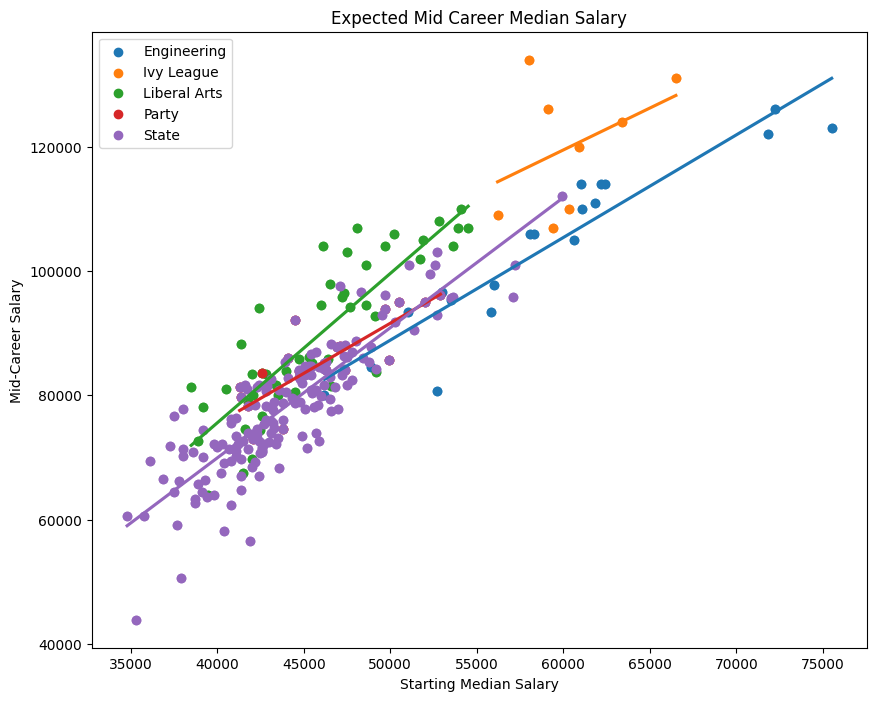

In [102]:
# g = sns.FacetGrid(data, row = 'continent', aspect = 2)
# g = g.map(plt.scatter, x= data['year'], y = data['lifeExp'])

# plt.show()

#Using groupby and seaborn to create a single graph with all the regression lines contained
df_by_colleges = df_by_colleges.rename(columns = {"Starting Median":"Starting_Median", 
"Mid-Career Median":"Mid_Career_Median"})
figure(figsize=(10,8))
for name, group in df_by_colleges.groupby('School Type'):
    plt.scatter(group.Starting_Median, group.Mid_Career_Median, label = name)
    sns.regplot(x = group.Starting_Median, y = group.Mid_Career_Median, data = df_by_colleges, ci=None)

plt.title('Expected Mid Career Median Salary')
plt.xlabel('Starting Median Salary')
plt.ylabel('Mid-Career Salary')
plt.legend()
plt.show()

# sns.scatterplot(data['year'], data['lifeExp'], hue = data['continent'])
# plt.show()

The Ivy League schools regression line has a higher intersect (higher starting salaries than other schools) and lower slope (less increase in mid career salary from an increase in starting salary). This could partly be due to a lesser number of Ivy League schools, meaning a smaller number of datapoints. Liberal Arts schools have the highest regression line slope, meaning that a higher starting salary goes a longer way in getting a higher mid career salary

From this regression line, we can see that the relationship between Starting_Median and Mid_Career_Median is fairly linear, which shows that if you have a higher starting salary out of college you will most likely also have a higher mid career salary. This lines up with our thought process, and means that we can use a regresssion prediction algorithm to predict mid career salaries of these students. 

Before jumping into our regression line predictor, we have to enumerate our school type column, because it is currently a column with Strings in it rather than floats or integers. In order to do linear regression, we needed numeric values, and so we made a quick function that would allow us to change all of the school types to numbers, attaching numbers to each school type manually. 

In [103]:
#Creating a function to enumerate the school type columns
def school_enumerator(x):
    if x == 'Engineering':
        return 0
    if x == 'Party':
        return 1 
    if x == 'Liberal Arts':
        return 2
    if x == 'Ivy League':
        return 3
    if x == 'State':
        return 4

#Applying the function to the school number column 
df_by_colleges['School Number'] = df_by_colleges['School Type'].apply(school_enumerator)
df_by_colleges

,School Name,School Type,Starting_Median,Mid_Career_Median,Mid-Career 10%,Mid-Career 25%,Mid-Career 75%,Mid-Career 90%,School Number
0,Massachusetts Institute of Technology (MIT),Engineering,72200.0,126000.0,76800.0,99200.0,168000.0,220000.0,0
1,California Institute of Technology (CIT),Engineering,75500.0,123000.0,NaN,104000.0,161000.0,NaN,0
2,Harvey Mudd College,Engineering,71800.0,122000.0,NaN,96000.0,180000.0,NaN,0
3,Polytechnic University of New York Brooklyn,Engineering,62400.0,114000.0,66800.0,94300.0,143000.0,190000.0,0
4,Cooper Union,Engineering,62200.0,114000.0,NaN,80200.0,142000.0,NaN,0
...,...,...,...,...,...,...,...,...,...
264,Austin Peay State University,State,37700.0,59200.0,32200.0,40500.0,73900.0,96200.0,4
265,Pittsburg State University,State,40400.0,58200.0,25600.0,46000.0,84600.0,117000.0,4
266,Southern Utah University,State,41900.0,56500.0,30700.0,39700.0,78400.0,116000.0,4
267,Montana State University - Billings,State,37900.0,50600.0,22600.0,31800.0,78500.0,98900.0,4


Now that we've enumerated our school type column, we can create the prediction model using the following code and sklearn. 

Note: Please download sklearn in order to continue with this part of the module, the documentation is given here:

Sklearn Documentation: https://scikit-learn.org/stable/

In [104]:
#Importing all the libraries necessary for regression 
from sklearn import metrics
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
#Splitting into training and test sets
X_train, X_test, y_train, y_test = train_test_split(df_by_colleges[['School Number', 'Starting_Median']], 
df_by_colleges['Mid_Career_Median'],random_state=42, test_size = 0.2)

#Creating the model for linear regression and fitting it to our training sets
model_ols = linear_model.LinearRegression()
model_ols.fit(X_train,y_train) 

#Using Cross Validation to check accuracy and test our model
scores = cross_val_score(model_ols, X_train, y_train, cv=10)
print("Cross Validation - \nMean:", scores.mean(), "| Standard deviation:",
scores.std())

print("The accuracy of the model using r^2 technique is: ",  model_ols.score(X_test, y_test))


Cross Validation - 
Mean: 0.7772531625019304 | Standard deviation: 0.07090131183391643
The accuracy of the model using r^2 technique is:  0.8423905920279562


From the model_ols.score, we can see that we have quite high accuracy, reaching 0.842. This is a good number, and demonstrates that our model is working but not extremely accurate yet. 

Next, we want to create a regression predictor using the same technique, but with School Region as the secondary parameter, to see whether this will create a more accurate predictor or not. 

In [105]:
#Creating a function to enumerate the school type columns
def region_enumerator(x):
    if x == 'California':
        return 0
    if x == 'Northeastern':
        return 1 
    if x == 'Southern':
        return 2
    if x == 'Western':
        return 3
    if x == 'Midwestern':
        return 4

#Applying the function to the school number column 
df_by_region['Type Number'] = df_by_region['Region'].apply(region_enumerator)
df_by_region

,School Name,Region,Starting Median,Mid-Career Median,Mid-Career 10%,Mid-Career 25%,Mid-Career 75%,Mid-Career 90%,Type Number
0,Stanford University,California,70400.0,129000.0,68400.0,93100.0,184000.0,257000.0,0
1,California Institute of Technology (CIT),California,75500.0,123000.0,NaN,104000.0,161000.0,NaN,0
2,Harvey Mudd College,California,71800.0,122000.0,NaN,96000.0,180000.0,NaN,0
3,University of California Berkeley,California,59900.0,112000.0,59500.0,81000.0,149000.0,201000.0,0
4,Occidental College,California,51900.0,105000.0,NaN,54800.0,157000.0,NaN,0
...,...,...,...,...,...,...,...,...,...
315,State University of New York (SUNY) at Potsdam,Northeastern,38000.0,70300.0,35100.0,51200.0,100000.0,179000.0,1
316,Niagara University,Northeastern,36900.0,69700.0,44000.0,57000.0,92000.0,128000.0,1
317,State University of New York (SUNY) at Fredonia,Northeastern,37800.0,66200.0,32800.0,44200.0,93300.0,181000.0,1
318,University of Southern Maine,Northeastern,39400.0,63600.0,40400.0,47900.0,85700.0,117000.0,1


In [106]:
#Importing all the libraries necessary for regression 
from sklearn import metrics
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
#Splitting into training and test sets
X_train, X_test, y_train, y_test = train_test_split(df_by_region[['Type Number', 'Starting Median']], 
df_by_region['Mid-Career Median'],random_state=42, test_size = 0.2)

#Creating the model for linear regression and fitting it to our training sets
model_ols = linear_model.LinearRegression()
model_ols.fit(X_train,y_train) 

#Using Cross Validation to check accuracy and test our model
scores = cross_val_score(model_ols, X_train, y_train, cv=10)
print("Cross Validation - \nMean:", scores.mean(), "| Standard deviation:",
scores.std())

print("The accuracy of the model using r^2 technique is: ",  model_ols.score(X_test, y_test))


Cross Validation - 
Mean: 0.7587173400930513 | Standard deviation: 0.05440667755155909
The accuracy of the model using r^2 technique is:  0.8202200447945474


We can see from this result that the two regression predictiors are very similar, with the school type beating out school region's accuracy by a small amount. However, both of these predictors are very accurate and can be used to get a good estimate of how much a student will make out of college using these predictors. 

<h2>Final Notes</h2>

<h3>Motivation</h3>

This project was naturally motivated for our team. Since we are currently college students, finding a dataset that had this much valuable and interesting information about college students' salaries was compelling. We will soon be entering the job market ourselves, and so we thought it would be a unique idea to look into how various factors can affect the undergraduate salary. 

As undergraduate students prepare to enter the job market, understanding their employment prospects and potential salaries can be important for making informed decisions about their career paths. Analyzing a dataset on undergraduate student salaries can provide valuable insights into the job market for recent graduates, as well as the overall state of the economy and specific industries. By studying this data, our group can help shed light on these important issues and potentially make a positive impact on the lives and career opportunities of undergraduate students.

Since people look a lot at starting salaries, we wanted to do data analysis on whether this was the only factor that truly mattered, and if this was the main feature that students should look at when job hunting out of college. With this in mind, we also put heavy emphasis on mid-career salaries and how they are affected by starting salaries, to depict how graduating students could pick the best possible job for themselves.  

<h3>Data Collection and Parsing</h3>

We found our dataset on Kaggle, which is one of the world's largest repositories of online databases that anyone can access for free. The dataset was broken down into 3 separate CSV files, which all contained useful information that we ended up utilizing throughout our tutorial, although for the predictors we ended up focusing on the databases by region and college type, as we thought these would be the best features to test on. 

Before we started doing analysis on our data, we had to convert the string objects to float values, and we did this by removing the $ signs and removing the comma symbols as well. Once we did this, we renamed the columns to make it more easily accessible for the rest of the tutorial and called more easily. Alongside this, we had to enumerate the string values to correspond with features so that we could feed them into our regression predictor, and so we made a simple function that attaches integers to the columns that had strings, such as "School Type" and "Region".  

<h3>Exploratory Data Analysis</h3>

We wrote code to explore several aspects of the data about colleges and salaries given in the three dataframes, mainly by creating plots which compare salaries based on factors such as the colleges' region and type. One such data visualisation we made compares starting median, mid-career median, and the 90th percentile mid-career median salaries through the use of a box plot that shows how these respective salaries are distributed. Another technique we made use of was the "groupby" function, that allowed us to create a scatterplot with multiple regression lines trailing through it. This plot gave us a great idea of what our final predictor might look like based on the various school types. 

Through analysis of the bar graphs, box plots, and scatter plots we made, we gained several insights into the colleges relation to earning potential, such as discrepancies in salaries based on the region where the college is located, and higher starting salaries for engineering schools than other types. 

We used these insights to make decisions about how we should go about predicting salaries based on college information.

<h3>Hypothesis Testing</h3>

The bulk of our hypothesis testing was regarding the best way to predict mid career salaries. This involved determining and choosing appropriate features. We did not simultaneously train our regression model for predicting mid career salary on college region, college type, and starting salary, since too many features and not enough training examples would lead to overfitting.

With this in mind, we trained two models separately: both use starting median salary as a feature, but one additionally uses college region while the other uses college type. The r^2 score for the first model (college type) was 84% and for the seond model (college region) was 82%.

Since these scores are similar, we can say that although college type and college region are features that affect the mid-career salary, the starting salary is the most important feature in determining what the mid-career salary will be. 

<h2>Closing Thoughts</h2>

To conclude, let's look at some of the questions we posed at the start of the tutorial. 

1. What factors affect Mid-Career Salaries, and is it heavily dependant on starting salary? - We can answer this through our regression predictors. Since both of them had very similar outcomes, we can say that the starting salary does indeed have the highest impact on mid-career salaries, but that other features also affect it, such as region and college type. 

2. Is there a relationship between earning potential and college type/region? - Yes. As we saw in the exploratory data analysis section, there were bar graphs depicting how college type can potentially have a heavy impact on mid-career salaries. For example, graduates from engineering colleges had a $40,000 difference when compared to party school graduates. 

3. Do the majors that have the highest starting salary have the highest mid career salaries, and vice vesa? - Interestingly enough, the answer to this question is not always. From the physician's assistant example, although they had a very high starting salary and it seemed like they were on a good career path, their percentage change was only 23.4%, compared to the mean percentage change of 69.3%. Alongside this, the chemical engineer had a lower starting salary, but a much higher mid-career salary than the physician's assistant. This shows that although starting salaries can be high, it does not always translate into a high mid-career salary. 